# August 2015 
# Author: FBB

### This is a demo of the famous Anscombe's Quartet 
### developed BY Federica B Bianco, NYU @fedhere 
### for CUSP  2015 Fall  Urban Informatics. 

## The moral of the story is: look at your data!


In [1]:
import os
import sys
import numpy as np
import pylab as pl

import json

s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### lets read in a file which is not a regular csv file, called anscombe.txt, but let's use the pandas module, read_csv function

In [2]:
import pandas as pd
if not os.path.isfile("anscombe.txt"):
    !curl -O https://raw.githubusercontent.com/fedhere/UInotebooks/master/anscombe.txt
pd.read_csv("anscombe.txt", delimiter=' ')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Anscombe's,Quartet,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Anscombe-Data-Set,I,I,II,II,III,III,IV,IV,NaN,NaN,NaN
1,NaN,X,Y,X,Y,X,Y,X,Y,NaN,NaN,NaN
2,NaN,10,8.04,10,9.14,10,7.46,8,6.58,NaN,NaN,NaN
3,NaN,8,6.95,8,8.14,8,6.77,8,5.76,NaN,NaN,NaN
4,NaN,13,7.58,13,8.74,13,12.74,8,7.71,NaN,NaN,NaN
5,NaN,9,8.81,9,8.77,9,7.11,8,8.84,NaN,NaN,NaN
6,NaN,11,8.33,11,9.26,11,7.81,8,8.47,NaN,NaN,NaN
7,NaN,14,9.96,14,8.1,14,8.84,8,7.04,NaN,NaN,NaN
8,NaN,6,7.24,6,6.13,6,6.08,8,5.25,NaN,NaN,NaN
9,NaN,4,4.26,4,3.1,4,5.39,19,12.5,NaN,NaN,NaN


## pandas organizes datasets in "data frames"

## lets read the file a little better by identifying what to use as header to name our variables

In [3]:
pd.read_csv("anscombe.txt", header = [1, 2], delimiter=' ')

Anscombe-Data-Set       I             II           III             IV  \
   Unnamed: 0_level_1       X      Y       X     Y       X      Y       X   
0                 NaN  10.000   8.04  10.000  9.14  10.000   7.46   8.000   
1                 NaN   8.000   6.95   8.000  8.14   8.000   6.77   8.000   
2                 NaN  13.000   7.58  13.000  8.74  13.000  12.74   8.000   
3                 NaN   9.000   8.81   9.000  8.77   9.000   7.11   8.000   
4                 NaN  11.000   8.33  11.000  9.26  11.000   7.81   8.000   
5                 NaN  14.000   9.96  14.000  8.10  14.000   8.84   8.000   
6                 NaN   6.000   7.24   6.000  6.13   6.000   6.08   8.000   
7                 NaN   4.000   4.26   4.000  3.10   4.000   5.39  19.000   
8                 NaN  12.000  10.84  12.000  9.13  12.000   8.15   8.000   
9                 NaN   7.000   4.82   7.000  7.26   7.000   6.42   8.000   
10                NaN   5.000   5.68   5.000  4.74   5.000   5.73   8.000   
11                NaN     NaN    NaN     NaN   NaN     NaN    NaN     NaN   
12                NaN   9.000   7.50   9.000  7.50   9.000   7.50   9.000   
13                NaN     NaN    NaN     NaN   NaN     NaN    NaN     NaN   
14                NaN  10.000   3.75  10.000  3.75  10.000   3.75  10.000   
15                NaN     NaN    NaN     NaN   NaN     NaN    NaN     NaN   
16                NaN   0.816    NaN   0.816   NaN   0.816    NaN   0.817   

          Unnamed: 9_level_0 Unnamed: 10_level_0  
        Y Unnamed: 9_level_1 Unnamed: 10_level_1  
0    6.58                NaN                 NaN  
1    5.76                NaN                 NaN  
2    7.71                NaN                 NaN  
3    8.84                NaN                 NaN  
4    8.47                NaN                 NaN  
5    7.04                NaN                 NaN  
6    5.25                NaN                 NaN  
7   12.50                NaN                 NaN  
8    5.56                NaN                 NaN  
9    7.91                NaN                 NaN  
10   6.89                NaN                 NaN  
11    NaN                NaN                 NaN  
12   7.50               Mean                 NaN  
13    NaN                NaN                 NaN  
14   3.75           Variance        (Population)  
15    NaN                NaN                 NaN  
16    NaN        Correlation           (Pearson)

## lets read the file a little better yet by only reading the rows we want 

In [4]:
pd.read_csv("anscombe.txt", header = [1, 2], nrows = 11, delimiter=' ')

Anscombe-Data-Set   I         II       III         IV         \
   Unnamed: 0_level_1   X      Y   X     Y   X      Y   X      Y   
0                 NaN  10   8.04  10  9.14  10   7.46   8   6.58   
1                 NaN   8   6.95   8  8.14   8   6.77   8   5.76   
2                 NaN  13   7.58  13  8.74  13  12.74   8   7.71   
3                 NaN   9   8.81   9  8.77   9   7.11   8   8.84   
4                 NaN  11   8.33  11  9.26  11   7.81   8   8.47   
5                 NaN  14   9.96  14  8.10  14   8.84   8   7.04   
6                 NaN   6   7.24   6  6.13   6   6.08   8   5.25   
7                 NaN   4   4.26   4  3.10   4   5.39  19  12.50   
8                 NaN  12  10.84  12  9.13  12   8.15   8   5.56   
9                 NaN   7   4.82   7  7.26   7   6.42   8   7.91   
10                NaN   5   5.68   5  4.74   5   5.73   8   6.89   

   Unnamed: 9_level_0 Unnamed: 10_level_0  
   Unnamed: 9_level_1 Unnamed: 10_level_1  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  
5                 NaN                 NaN  
6                 NaN                 NaN  
7                 NaN                 NaN  
8                 NaN                 NaN  
9                 NaN                 NaN  
10                NaN                 NaN

## if we are happy lets save the data frame read by pandas
## we can drop the columns we do not need after that

In [5]:
ansc = pd.read_csv("anscombe.txt", header = [1, 2], nrows = 11, delimiter=' ')
#fig=pl.figure(figsize=(10,10))

print (ansc.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 11 columns):
(Anscombe-Data-Set, Unnamed: 0_level_1)       0 non-null float64
(I, X)                                        11 non-null int64
(I, Y)                                        11 non-null float64
(II, X)                                       11 non-null int64
(II, Y)                                       11 non-null float64
(III, X)                                      11 non-null int64
(III, Y)                                      11 non-null float64
(IV, X)                                       11 non-null int64
(IV, Y)                                       11 non-null float64
(Unnamed: 9_level_0, Unnamed: 9_level_1)      0 non-null float64
(Unnamed: 10_level_0, Unnamed: 10_level_1)    0 non-null float64
dtypes: float64(7), int64(4)
memory usage: 1.0 KB
None


## the dataframe is a class. in this case the class hosts 4 datasets: I,II,III,IV. we can think of the dataframe as a python dictionary as well. 
## if we think of it as a class lets refer to the first dataset identified as I as ansc.I
## otherwise as a dictionary as ansc[I]

this structure propagates downward to elements of ansc.I too!

In [6]:
print (ansc.I)

#print (ansc['I'])


     X      Y
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68


# Lets Look at the first and second moment: mean and standard deviation

In [7]:
print("Distribution Means:               {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()))
print("Distribution Standard Deviations: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()))


Distribution Means:               7.50, 7.50, 7.50, 7.50
Distribution Standard Deviations: 2.03, 2.03, 2.03, 2.03


# cool! they are identical! identical mean, identical standard deviation
# hence we are looking at the same distribution i guess. 

## let's fit a line to it

In [8]:
import statsmodels.api as sm

regmodels={}
for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    rm = sm.OLS(a.Y, a.X)
    regmodels[i] = rm.fit()
    print ("linear regression slope {}".format(regmodels[i].params))


linear regression slope X    0.796803
dtype: float64
linear regression slope X    0.796793
dtype: float64
linear regression slope X    0.796673
dtype: float64
linear regression slope X    0.796783
dtype: float64


## the slopes are also the same to the third decimal digit! we must indeed be looking at the same distribution

## what other ways to see the data could help us understand what we are looking at? how about a boxplot?

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


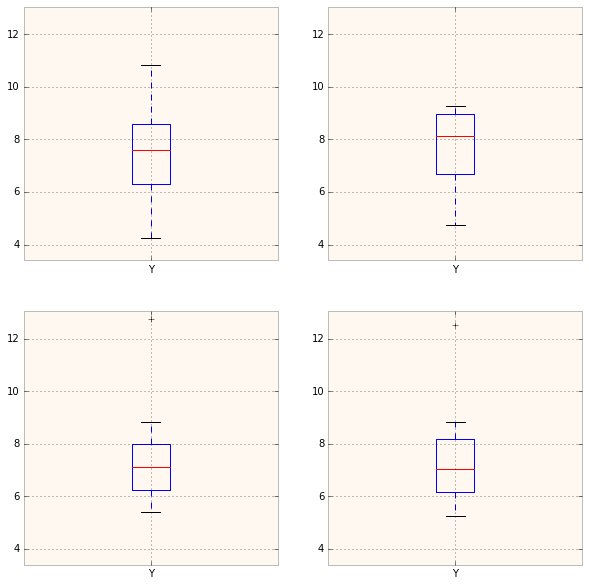

In [9]:
fig = pl.figure(figsize=(10,10))
ax = [0]*4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)
# setting y axis limits to the max and mean of each distribution
ylims = (min(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) + 0.3,
         max(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) + 0.3)
for i,a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    a.boxplot(column = 'Y', ax = ax[i])
    ax[i].set_ylim(ylims)
pl.show()

# hmmmm some differences are appearing. 

## lets make a histogram of the data. this is not much data but if we were looking at really large datasets histogramming rather then plotting the data directly may be necessary

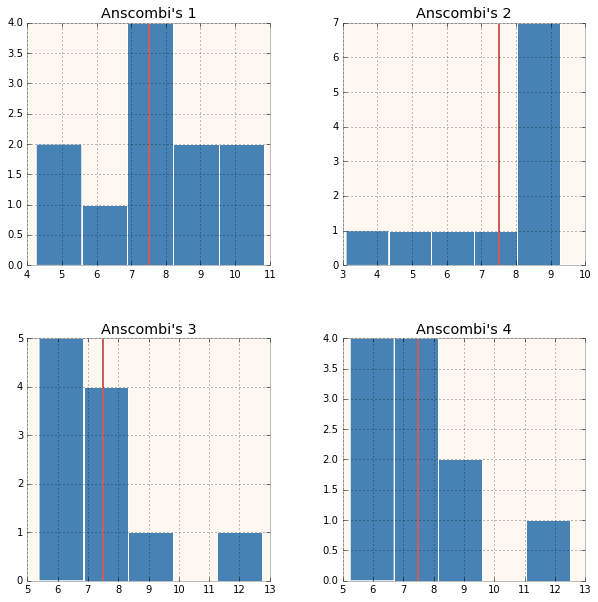

In [10]:
fig = pl.figure(figsize = (10,10))
ax=[0] * 4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)

for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    #
    a.hist(column = 'Y', color = 'SteelBlue', bins = 5, ax = ax[i])
    ax[i].plot([a.Y.mean(), a.Y.mean()], ax[i].get_ylim(), '-', color = 'IndianRed', lw = 2)
    ax[i].set_title("Anscombi's %d"%(i+1))
pl.show()

# lets plot the data itself... surprise!

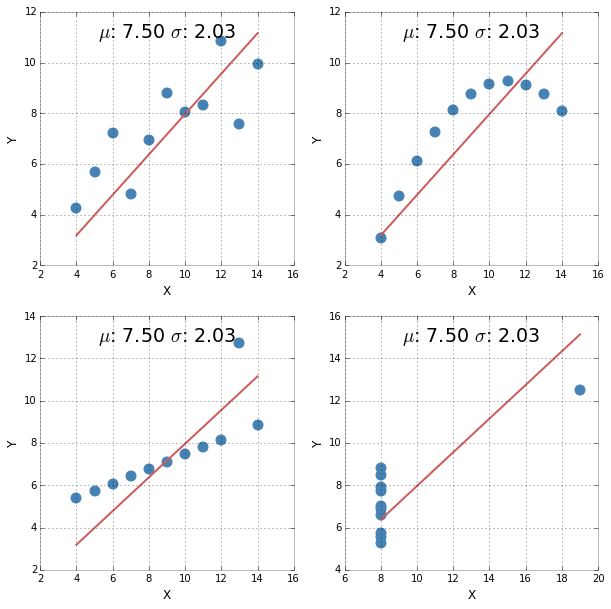

In [11]:
fig=pl.figure(figsize=(10,10))
ax=[0]*4

ax[0]=fig.add_subplot(221)
ax[1]=fig.add_subplot(222)
ax[2]=fig.add_subplot(223)
ax[3]=fig.add_subplot(224)

for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #
    a.plot(kind='scatter',s=100, x='X',y='Y', color='SteelBlue', ax=ax[i])
    xlims=ax[i].get_xlim()
    X_prime = np.linspace(a.X.min(), a.X.max(), 100)[:, np.newaxis]
    y_hat = regmodels[i].predict(X_prime)
    ax[i].plot(X_prime[:, 0], y_hat, '-', color='IndianRed')  
    ax[i].text(0.5, 0.9, r"$\mu$: %.2f $\sigma$: %.2f"%(a.Y.mean(),a.Y.std()), horizontalalignment="center", transform=ax[i].transAxes, fontsize=19)
pl.savefig(os.getenv('PUI15PLOTS')+"/anscombe.png")

## note that the higher order moments also suggested differences

Distribution Skewness: -0.07, -1.32, 1.86, 1.51
Distribution Kurtosis: -0.53, 0.85, 4.38, 3.15


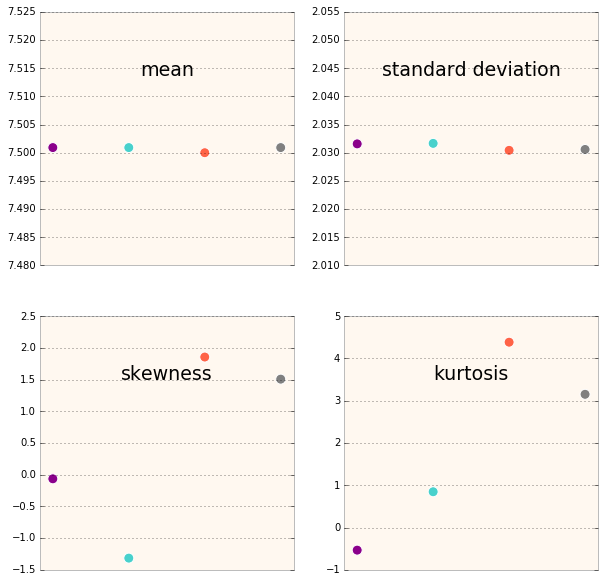

In [12]:
print ("Distribution Skewness: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.skew(), ansc.II.Y.skew(), ansc.III.Y.skew(), ansc.IV.Y.skew()))
print ("Distribution Kurtosis: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.kurt(), ansc.II.Y.kurt(), ansc.III.Y.kurt(), ansc.IV.Y.kurt()))

fig = pl.figure(figsize=(10, 10))
ax = [0] * 4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)
colors=['DarkMagenta', 'MediumTurquoise', 'tomato', 'gray']
for i in range(4):
    ax[i].set_xticks([],[])
ax[0].scatter(range(4), [ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()], 
              s = 100, c = colors)
ax[0].text(0.5, 0.75, 'mean', horizontalalignment = "center", 
           transform = ax[0].transAxes, fontsize = 19)
ax[1].scatter(range(4), [ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()], 
              s = 100, c = colors)
ax[1].text(0.5, 0.75, 'standard deviation', horizontalalignment = "center", 
           transform = ax[1].transAxes, fontsize = 19)
ax[2].scatter(range(4), [ansc.I.Y.skew(), ansc.II.Y.skew(), ansc.III.Y.skew(), ansc.IV.Y.skew()], 
              s = 100, c = colors)
ax[2].text(0.5, 0.75, 'skewness', horizontalalignment = "center", 
           transform = ax[2].transAxes, fontsize = 19)
ax[3].scatter(range(4), [ansc.I.Y.kurt(), ansc.II.Y.kurt(), ansc.III.Y.kurt(), ansc.IV.Y.kurt()], 
              s = 100, c = colors)
ax[3].text(0.5, 0.75, 'kurtosis', horizontalalignment = "center", 
           transform = ax[3].transAxes, fontsize = 19)


# what to the residual of the linear fit say?

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     257.9
Date:                Mon, 19 Sep 2016   Prob (F-statistic):           1.81e-08
Time:                        22:42:13   Log-Likelihood:                -20.044
No. Observations:                  11   AIC:                             42.09
Df Residuals:                      10   BIC:                             42.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              0.7968      0.050     16.059      0.0

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


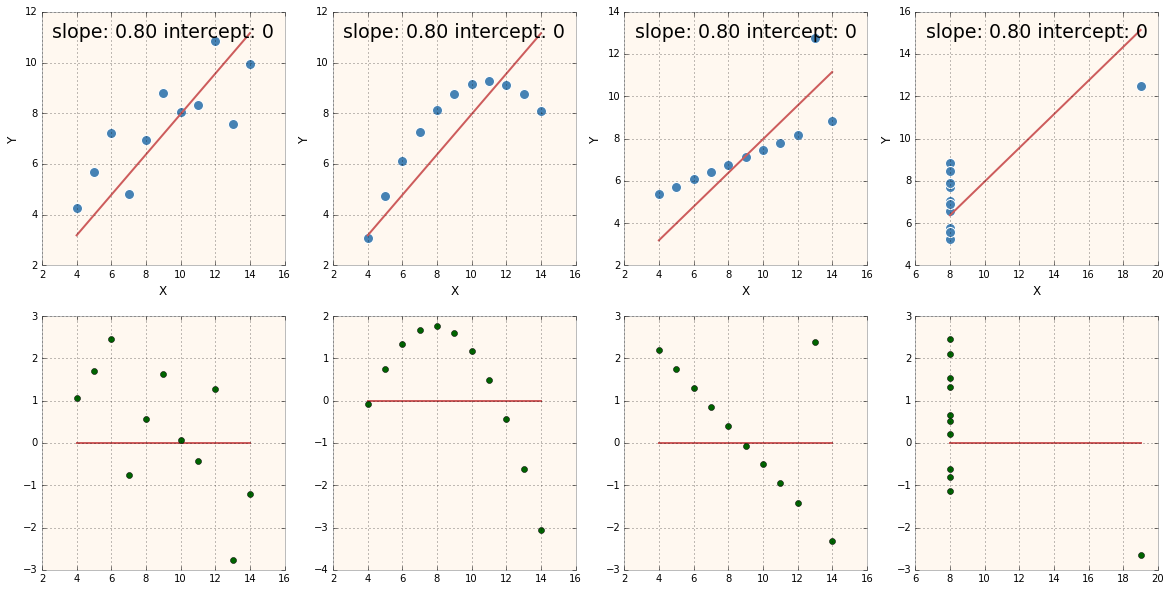

In [13]:
fig = pl.figure(figsize = (20, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)

for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    print (regmodels[i].summary())
    a.plot(kind = 'scatter', s = 100, x = 'X', y = 'Y', 
           color = 'SteelBlue', ax = ax[i])
    xlims = ax[i].get_xlim()

    X_prime = np.linspace(a.X.min(), a.X.max(), 100)[:, np.newaxis]
    y_hat = regmodels[i].predict(X_prime)
    ax[i].plot(X_prime[:, 0], y_hat, '-', color = 'IndianRed')  
    ax[i].text(0.5, 0.9, r"slope: %.2f intercept: 0"%(regmodels[i].params), 
        horizontalalignment="center", transform = ax[i].transAxes, fontsize = 19)
    ax[i + 4].plot([a.X.min(), a.X.max()], [0, 0], '-', color = 'IndianRed')
    ax[i + 4].plot(a.X, a.Y - regmodels[i].predict(a.X), 'o', color='DarkGreen')
    ax[i + 4].set_xlim(xlims)